<a href="https://colab.research.google.com/github/Yogesh914/CheeseHacks-FaceFirst/blob/main/workshop_lab_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
# Let's incorporate the widely-used MNIST dataset, which consists of handwritten digit images.

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64, shuffle=True, num_workers=2)


100%|██████████| 9912422/9912422 [00:00<00:00, 206969958.11it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 30620751.72it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 94036187.32it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 22842360.63it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [3]:
# Define the neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = SimpleNet()

In [4]:
# Set loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Modify this value to experiment with different learning rates
learning_rate = 0.01

optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)

In [5]:
# Modify the num_epochs number and see what happens
num_epochs = 10
loss_history = []

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

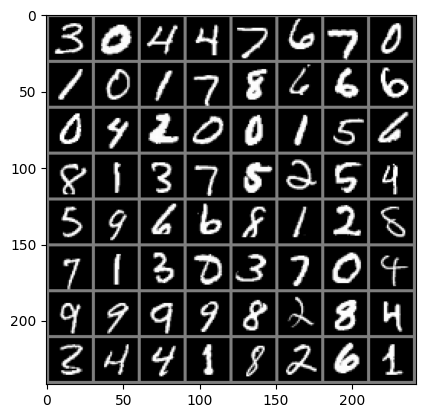

In [6]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))

First batch of epoch:  0
GroundTruth:      8     7     6     5
Predicted:      7     6     6     6


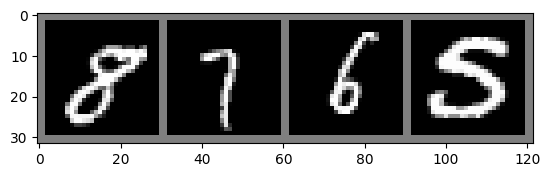

Epoch 1, Loss: 0.3901005576430226
First batch of epoch:  1
GroundTruth:      5     0     0     4
Predicted:      5     0     0     4


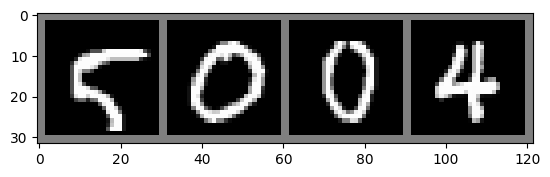

Epoch 2, Loss: 0.1996032522955556
First batch of epoch:  2
GroundTruth:      3     7     0     2
Predicted:      3     7     0     2


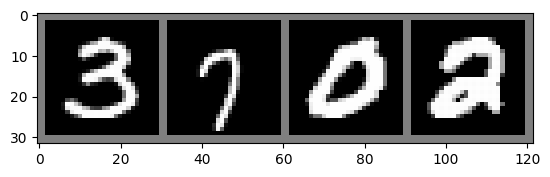

Epoch 3, Loss: 0.15214103502410053
First batch of epoch:  3
GroundTruth:      7     3     1     2
Predicted:      7     3     1     2


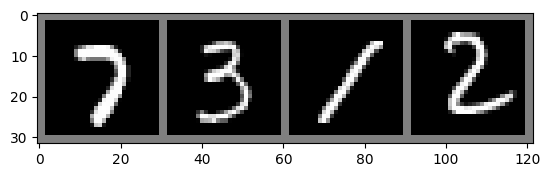

Epoch 4, Loss: 0.1276187449097951
First batch of epoch:  4
GroundTruth:      3     9     3     5
Predicted:      3     9     3     5


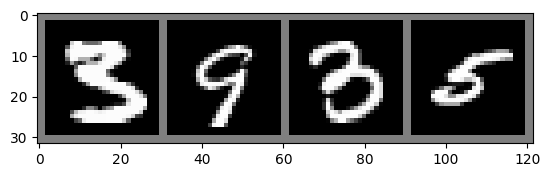

Epoch 5, Loss: 0.10940353735399716
First batch of epoch:  5
GroundTruth:      2     3     9     6
Predicted:      2     3     9     6


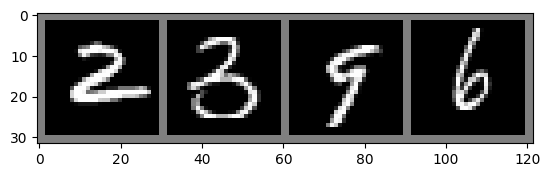

Epoch 6, Loss: 0.09505109552508478
First batch of epoch:  6
GroundTruth:      7     1     8     6
Predicted:      7     1     8     6


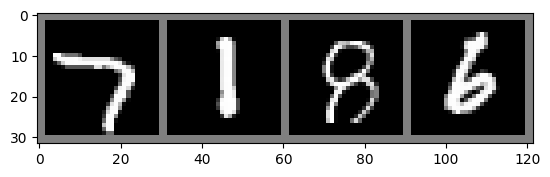

Epoch 7, Loss: 0.0866302775535812
First batch of epoch:  7
GroundTruth:      0     8     2     1
Predicted:      0     8     2     2


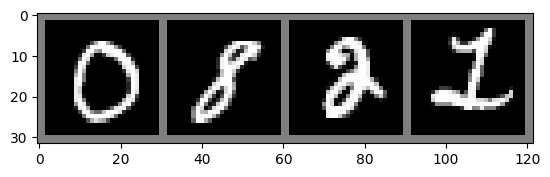

Epoch 8, Loss: 0.07866001677493861
First batch of epoch:  8
GroundTruth:      6     7     6     0
Predicted:      6     7     6     0


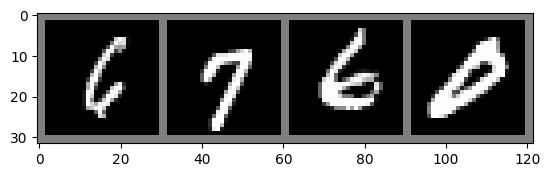

Epoch 9, Loss: 0.07052366815553085
First batch of epoch:  9
GroundTruth:      2     0     9     0
Predicted:      2     0     9     0


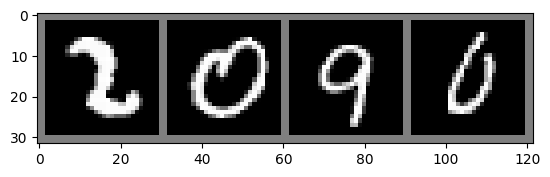

Epoch 10, Loss: 0.06614287284318048


In [7]:
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        # Print the first 4 predicted labels of the first batch in each epoch
        if i == 0:
            _, predicted = torch.max(outputs, 1)
            print('First batch of epoch: ', epoch)
            print('GroundTruth: ', ' '.join('%5s' % labels[j].item() for j in range(4)))
            print('Predicted: ', ' '.join('%5s' % predicted[j].item() for j in range(4)))
            imshow(torchvision.utils.make_grid(inputs[:4]))

    epoch_loss = running_loss / (i + 1)
    loss_history.append(epoch_loss)
    print(f"Epoch {epoch + 1}, Loss: {epoch_loss}")

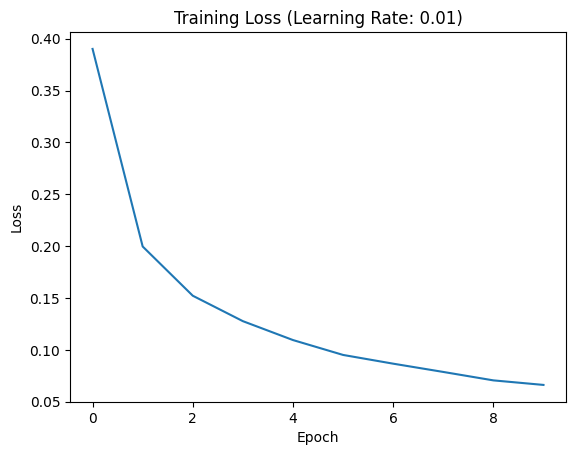

In [8]:
# Visualize the training loss
plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training Loss (Learning Rate: {learning_rate})')
plt.show()